In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cityblock
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [2]:
def knn_classifier(X_train, y_train, X_test, k):
    y_est = []
    idxs = []
    for i in range(len(X_test)):
        dic = {}
        distances = []
        for j in range(len(X_train)):
            distance = euclidean(X_test[i], X_train[j])
            if(distance in dic):
                dic[distance].append(j)
            else:
                distances.append(distance)
                dic[distance] = [j]
        
        distances.sort()
        knn = []
        for d in distances:
            for j in range(len(dic[d])):
                knn.append(dic[d][j])
                if len(knn)>=k:
                    break
            if len(knn)>=k:
                break
        idxs.append(knn[:k])
        #print(mode(knn[:k][0]))
        y_est.append(mode(y_train[knn[:k]])[0][0])
    return [np.array(y_est), np.array(idxs)]

In [3]:
df_train = np.genfromtxt(fname='mnist_train.csv', dtype=np.float64, delimiter=',', skip_header=1)
X_train = np.copy(df_train[:, 1:]/255)
y_train = np.copy(df_train[:, 0]).astype(np.int)
df_test = np.genfromtxt(fname='mnist_test.csv', dtype=np.float64, delimiter=',', skip_header=1)
X_test = np.copy(df_test[:, 1:]/255)
y_test = np.copy(df_test[:, 0]).astype(np.int)

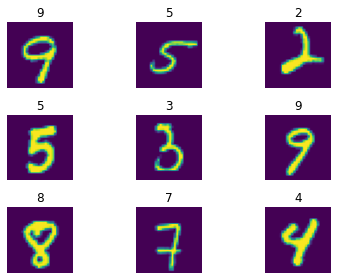

In [4]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.reshape(X_train[i], (28,28)))
    plt.title(y_train[i])
    plt.axis("off")
plt.tight_layout()
plt.savefig('step2')
plt.show()

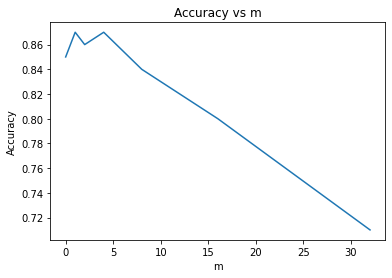

In [5]:
# Question 2.2.1
# As K increases the accuracy increases then decreases. There is an optimal k value that maximizes accuracy.
m_list = [0, 1, 2, 4, 8, 16, 32]
accuracy = []
for m in m_list:
    y_est, idxs = knn_classifier(X_train, y_train, X_test, 2*m+1)
    accuracy.append(accuracy_score(y_test, y_est))
plt.plot(m_list, accuracy)
plt.xlabel('m')
plt.ylabel('Accuracy')
plt.title('Accuracy vs m')
plt.savefig('221')
plt.show()

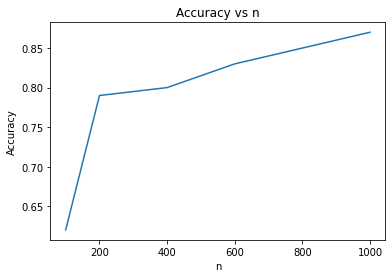

In [6]:
# Question 2.2.2
# As the size of the subset increases the Accuracy decreases
n_list = [100, 200, 400, 600, 800, 1000]
accuracy = []
k=3
for n in n_list:
    y_est, idxs = knn_classifier(X_train[:n], y_train[:n], X_test, 3)
    accuracy.append(accuracy_score(y_test, y_est))
plt.plot(n_list, accuracy)
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n')
plt.savefig('222')
plt.show()

In [7]:
# Question 2.2.3
# No it does not, for k = 3 both have 0 accuracy
def knn_classifier_manhattan(X_train, y_train, X_test, k):
    y_est = []
    idxs = []
    for i in range(len(X_test)):
        dic = {}
        distances = []
        for j in range(len(X_train)):
            distance = cityblock(X_test[i], X_train[j])
            if(distance in dic):
                dic[distance].append(j)
            else:
                distances.append(distance)
                dic[distance] = [j]
        
        distances.sort()
        knn = []
        for d in distances:
            for j in range(len(dic[d])):
                knn.append(dic[d][j])
                if len(knn)>=k:
                    break
            if len(knn)>=k:
                break
        idxs.append(knn[:k])
        y_est.append(mode(y_train[knn[:k]])[0][0])
    return [np.array(y_est), np.array(idxs)]

In [8]:
y_est, idxs = knn_classifier(X_train, y_train, X_test, 3)
y_est_c, idxs_c = knn_classifier_manhattan(X_train, y_train, X_test, 3)
acc = accuracy_score(y_test, y_est)
acc_c = accuracy_score(y_test, y_est_c)
print('Euclidean Accuracy: ', acc)
print('Manhattan Accuracy: ', acc_c)

Euclidean Accuracy:  0.87
Manhattan Accuracy:  0.83


In [9]:
y_est, idxs = knn_classifier(X_train, y_train, X_test, 5)
acc = accuracy_score(y_test, y_est)
neq = y_est!=y_test
index = np.array([i for i in range(0, X_test.shape[0])])
#neq_test_samples = X_test[neq, :]
neq_knn = idxs[neq][:3]
neq_i = index[neq][:3]
print(neq_i)
print(neq_knn)

[7 8 9]
[[690 382 850 366 716]
 [931  17  82 223 149]
 [618   7 201 774 415]]


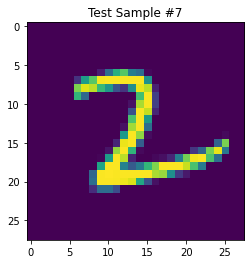

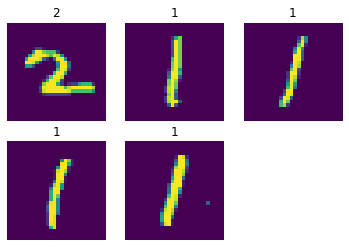

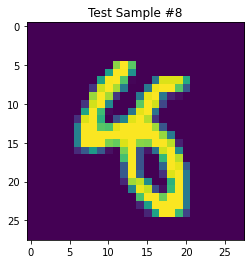

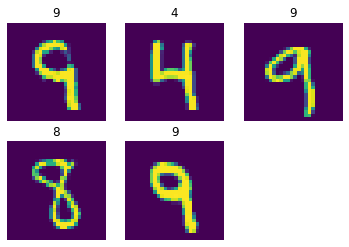

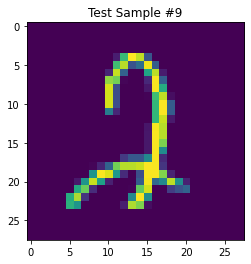

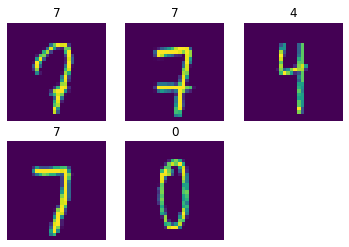

In [10]:
fig = plt.figure()
for j in range(3):
    plt.imshow(np.reshape(X_test[neq_i[j]], (28,28)))
    plt.title('Test Sample #' + str(neq_i[j]))
    plt.savefig('224s-' + str(neq_i[j]))
    plt.show()
    for i in range(5):
        plt.subplot(2, 3, i+1)
        plt.imshow(np.reshape(X_train[neq_knn[j][i]], (28,28)))
        plt.title(y_train[neq_knn[j][i]])
        plt.axis("off")
    plt.savefig('224nn-' + str(neq_i[j]))
    plt.show()

In [11]:
X_train.shape

(1000, 784)